# Group 2 Project - Dognition
this notebook is for exploring dogniton data
#    II. How do the features of the owners correlate to the number of tests completed?
#        2.3) Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

In [267]:
#set up of requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os
import openpyxl

In [268]:
#establish connection to data
dognitiondf = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")
data = dognitiondf
display(dognitiondf)

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [269]:
dognitiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

In [270]:
#checking missing values
missing_values = dognitiondf.isnull().sum()
missing_percent = (dognitiondf.isnull().sum()/len(dognitiondf))*100
print(pd.concat([missing_values, missing_percent], axis = 1, 
                keys = ['Missing Values', 'Percentage']))

                                                 Missing Values  Percentage
Dog ID                                                        0    0.000000
Total Tests Completed                                         0    0.000000
Mean ITI (days)                                            1268    7.049928
Mean ITI (minutes)                                         1268    7.049928
Median ITI (days)                                          1268    7.049928
Median ITI (minutes)                                       1268    7.049928
Time diff between first and last game (days)                  0    0.000000
Time diff between first and last game (minutes)               0    0.000000
User ID                                                       1    0.005560
Gender                                                        1    0.005560
Birthday                                                      1    0.005560
Breed                                                        16    0.088958
Breed_Type  

In [302]:
#Replace missing values
breed_mode = dognitiondf["Breed"].mode()[0]
print(breed_mode)
dognittiondf = dognitiondf["Breed"].fillna(breed_mode, inplace=True)
print(dognitiondf["Breed"].isnull().sum())

Mixed
0


In [307]:
#Replace missing values
maxdogs_mean = dognitiondf["Max_Dogs"].mean()
print(maxdogs_mean)
dognittiondf = dognitiondf["Max_Dogs"].fillna(maxdogs_mean)
print(dognitiondf["Max_Dogs"].isnull().sum())

1.2734500973033083
0


In [304]:
#Replace missing values
breedtype_mode = dognitiondf["Breed_Type"].mode()[0]
print(breedtype_mode)
dognittiondf = dognitiondf["Breed_Type"].fillna(breedtype_mode, inplace=True)
print(dognitiondf["Breed_Type"].isnull().sum())

Pure Breed
0


In [305]:
#Replace missing values
user_mode = dognitiondf["User ID"].mode()[0]
print(user_mode)
dognittiondf = dognitiondf["User ID"].fillna(user_mode, inplace=True)
print(dognitiondf["User ID"].isnull().sum())

ce7b75bc-7144-11e5-ba71-058fbc01cf0b
0


In [308]:
dognitiondf.isnull().sum()

Dog ID                                                0
Total Tests Completed                                 0
Mean ITI (days)                                    1268
Mean ITI (minutes)                                 1268
Median ITI (days)                                  1268
Median ITI (minutes)                               1268
Time diff between first and last game (days)          0
Time diff between first and last game (minutes)       0
User ID                                               0
Gender                                                1
Birthday                                              1
Breed                                                 0
Breed_Type                                            0
Breed_Group                                           1
Weight                                                1
Dog_Fixed                                             1
DNA_Tested                                            1
Dimension                                       

In [277]:
#2.3 Dog history: 
# dog ownership (Breed by max dogs)
# interest in breeding (breed by breed type) 
# # of dogs owned now or in a lifetime(User ID by max dogs)
#, etc …

In [278]:
# 1. most owned breed based on maximum of dogs
mostfreqbreed = dognitiondf[["Max_Dogs", "Breed"]]
freqownbreed = mostfreqbreed.groupby(["Max_Dogs", "Breed"]).size().reset_index(name="Count")
print(freqownbreed)

      Max_Dogs                      Breed  Count
0          0.0     Afghan Hound-Akita Mix      1
1          0.0           Airedale Terrier      2
2          0.0                      Akita      1
3          0.0        American Eskimo Dog      2
4          0.0  American Hairless Terrier      1
...        ...                        ...    ...
1982      20.0                      Other      1
1983      20.0                 Rottweiler      1
1984      20.0                   Shih Tzu      8
1985      36.0                   Shih Tzu     16
1986      36.0           Spinone Italiano      1

[1987 rows x 3 columns]


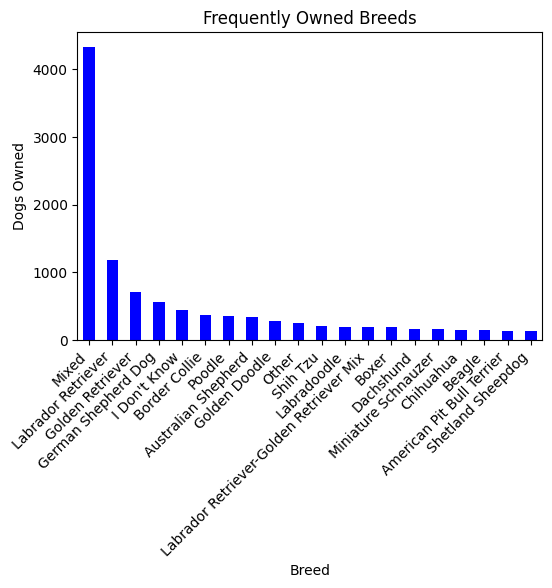

In [279]:
# 1. most owned breed based on maximum of dogs
maxdogslimit = dognitiondf[dognitiondf['Max_Dogs']<= 20]
breedcount = maxdogslimit['Breed'].value_counts().head (20)

plt.figure(figsize = (6, 4))
breedcount.plot( kind = 'bar', color = 'blue')
plt.title('Frequently Owned Breeds')
plt.xlabel('Breed') 
plt.ylabel('Dogs Owned')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [314]:
# 2. interest in breeding (breed to breed type)
breedingtype = dognitiondf[["Breed_Type", "Breed"]]
freqbreedtype = breedingtype.groupby(["Breed_Type", "Breed"]).size().reset_index(name="Count")
print(freqbreedtype)

       Breed_Type                                       Breed  Count
0     Cross Breed          Affenpinscher-Brussels Griffon Mix      1
1     Cross Breed                      Afghan Hound-Akita Mix      1
2     Cross Breed           Afghan Hound-Golden Retriever Mix      1
3     Cross Breed  Airedale Terrier-Catahoula Leopard Dog Mix      1
4     Cross Breed    Airedale Terrier-German Shepherd Dog Mix      1
...           ...                                         ...    ...
1323   Pure Breed                            Wire Fox Terrier     12
1324   Pure Breed                 Wirehaired Pointing Griffon      8
1325   Pure Breed                           Wirehaired Vizsla      1
1326   Pure Breed                              Xoloitzcuintli      5
1327   Pure Breed                           Yorkshire Terrier    132

[1328 rows x 3 columns]


                            Breed_Type  \
1102  Mixed Breed/ Other/ I Don't Know   
1238                        Pure Breed   
1213                        Pure Breed   
1207                        Pure Breed   
1101  Mixed Breed/ Other/ I Don't Know   
1152                        Pure Breed   
1275                        Pure Breed   
1131                        Pure Breed   
1108                    Popular Hybrid   
1103  Mixed Breed/ Other/ I Don't Know   
1297                        Pure Breed   
1110                    Popular Hybrid   
731                        Cross Breed   
1157                        Pure Breed   
1185                        Pure Breed   
1251                        Pure Breed   
1173                        Pure Breed   
1136                        Pure Breed   
1123                        Pure Breed   
1295                        Pure Breed   

                                        Breed  Count  
1102                                    Mixed   4313  
1238   

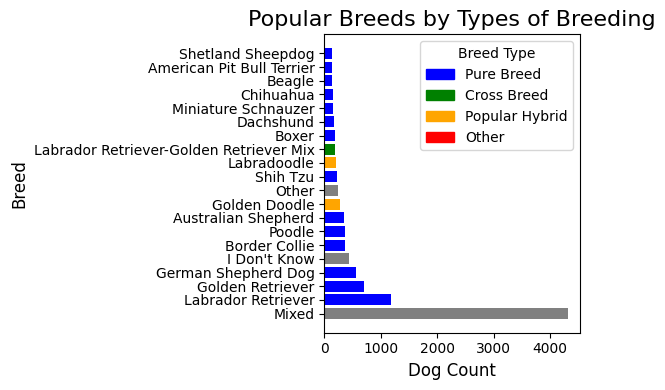

In [330]:
# 2. interest in breeding (breed to breed type)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

breed_count = (dognitiondf.groupby(['Breed_Type', 'Breed']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending=False).head(20))
print(breed_count)
color_map = {'Pure Breed': 'blue', 'Cross Breed': 'green', 'Popular Hybrid': 'orange', 'Other': 'red'}
breed_count['Color'] = breed_count['Breed_Type'].map(color_map)

if breed_count['Color'].isnull().any():
    print("Warning: Some Breed_Type values are missing in color_map. Filling with 'gray'.")
    breed_count['Color'] = breed_count['Color'].fillna('gray')

plt.figure(figsize=(6, 4))
plt.barh(breed_count['Breed'], breed_count['Count'], color=breed_count['Color'])
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=legend_handles, title='Breed Type', loc='best')
plt.title('Popular Breeds by Types of Breeding', fontsize=16)
plt.xlabel('Dog Count', fontsize=12)
plt.ylabel('Breed', fontsize=12)
plt.tight_layout()
plt.show()

In [324]:
# 2.5 interest in breeding (Users to breed type)
usersbreedingtype = dognitiondf[["User ID", "Breed_Type"]]
usersfreqbreedtype = usersbreedingtype.groupby(["User ID", "Breed_Type"]).size().reset_index(name="Count")
print(usersfreqbreedtype)

                                    User ID                        Breed_Type  \
0      ce134492-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
1      ce134a78-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
2      ce134be0-7144-11e5-ba71-058fbc01cf0b                       Cross Breed   
3      ce134d16-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
4      ce134e42-7144-11e5-ba71-058fbc01cf0b  Mixed Breed/ Other/ I Don't Know   
...                                     ...                               ...   
16626  ce9b2aba-7144-11e5-ba71-058fbc01cf0b                       Cross Breed   
16627  ce9b2eb6-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
16628  ce9b306e-7144-11e5-ba71-058fbc01cf0b                    Popular Hybrid   
16629  ce9b33b6-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
16630  ce9b35e6-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   

       Count  
0          2

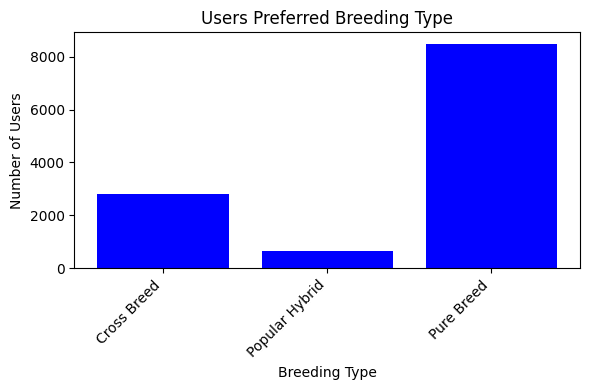

In [299]:
# 2.5 interest in breeding (Users to breed type)
import matplotlib.pyplot as plt
breeding_type = ['Pure Breed', 'Cross Breed', 'Popular Hybrid', 'Other']
filtered_data = dognitiondf[dognitiondf['Breed_Type'].isin(breeding_type)]
user_count = (filtered_data.groupby('Breed_Type')['User ID'].nunique().reset_index(name='User Count'))
plt.figure(figsize=(6, 4))
plt.bar(user_count['Breed_Type'], user_count['User Count'], color='blue')
plt.title('Users Preferred Breeding Type')
plt.xlabel('Breeding Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [300]:
# 3. Users maximum of owned dogs (User ID by Max dogs)
freqdogowners = dognitiondf[["Max_Dogs", "User ID"]]
freqowns = freqdogowners.groupby(["Max_Dogs", "User ID"]).size().reset_index(name = "Count")
print(freqowns)

       Max_Dogs                               User ID  Count
0           0.0  ce7b75bc-7144-11e5-ba71-058fbc01cf0b    502
1           1.0  ce13507c-7144-11e5-ba71-058fbc01cf0b      1
2           1.0  ce135ab8-7144-11e5-ba71-058fbc01cf0b      1
3           1.0  ce135f2c-7144-11e5-ba71-058fbc01cf0b      1
4           1.0  ce13615c-7144-11e5-ba71-058fbc01cf0b      1
...         ...                                   ...    ...
16257      12.0  ce29675e-7144-11e5-ba71-058fbc01cf0b     10
16258      13.0  ce135e14-7144-11e5-ba71-058fbc01cf0b     10
16259      15.0  ce66b9b0-7144-11e5-ba71-058fbc01cf0b      4
16260      20.0  ce2258a6-7144-11e5-ba71-058fbc01cf0b     16
16261      36.0  ce225842-7144-11e5-ba71-058fbc01cf0b     17

[16262 rows x 3 columns]


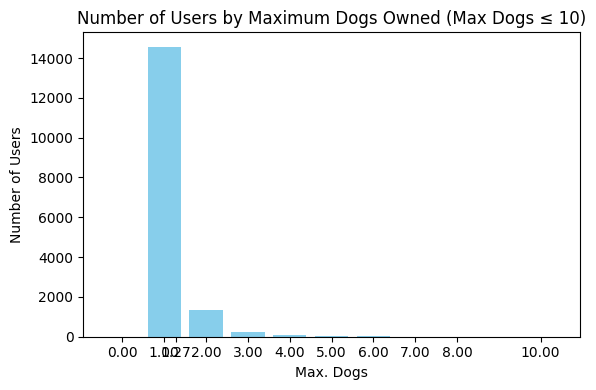

In [301]:
# 3. Users maximum of owned dogs (User ID by Max dogs)
count_data = dognitiondf.groupby('Max_Dogs', as_index=False)['User ID'].nunique()
count_data.rename(columns={'User ID': 'User Count'}, inplace=True)
filtered_data = count_data[count_data['Max_Dogs'] <= 10]

plt.figure(figsize=(6, 4))
plt.bar(filtered_data['Max_Dogs'], filtered_data['User Count'], color='skyblue')
plt.title('Number of Users by Maximum Dogs Owned (Max Dogs ≤ 10)')
plt.xlabel('Max. Dogs')
plt.ylabel('Number of Users')
plt.xticks(filtered_data['Max_Dogs'])  # Use filtered Max_Dogs for ticks
plt.tight_layout()
plt.show()